In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# **Step 1: Libraries**

In [2]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# **Step 2: Data Loading**

In [3]:
# Step 2: Load the data
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# **Step 3: Check the Dataset**

In [4]:
# Step 3: See the data
print(train.shape)
print(test.shape)
train.head()

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Visualize a Digit**

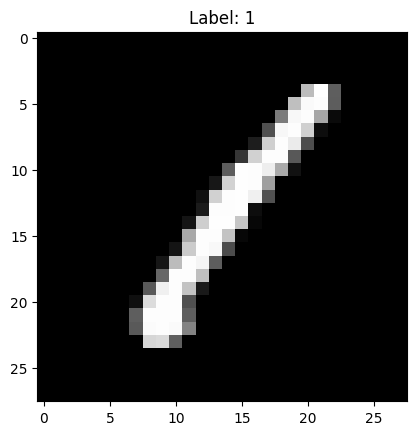

In [5]:
# Pick a random digit
digit = train.iloc[0, 1:].values
digit = digit.reshape(28,28)

plt.imshow(digit, cmap='gray')
plt.title(f"Label: {train.iloc[0, 0]}")
plt.show()


# **Step 4: Prepare X and Y**

In [6]:
# Step 4: Prepare X and y
X = train.drop('label', axis=1)
y = train['label']

# **Step 5: Normalize the pixel Values**

In [7]:
# Step 5: Normalize the pixel values
X = X / 255.0
test = test / 255.0  # Also normalize the test set
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Step 6: Train/Validation Split**

In [8]:
# Step 6: Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model 1: Logistic Regression**

In [9]:
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# **Check Model Accuracy on Validation Set**

In [10]:
# Predict on validation set
y_pred = model_log.predict(X_val)

# Calculate accuracy
accuracy_log = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy_log * 100:.2f}%")


Validation Accuracy: 91.89%


In [11]:
# Predict on the test data
test_predictions = model_log.predict(test)

# **Model 2: K-Nearest Neighbors (KNN)**

In [12]:
# Build KNN model
model_knn = KNeighborsClassifier(n_neighbors=3)  # You can tune k=3,5,7 etc
model_knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = model_knn.predict(X_val)
accuracy_knn = accuracy_score(y_val, y_pred_knn)
print(f"KNN Validation Accuracy: {accuracy_knn * 100:.2f}%")

KNN Validation Accuracy: 96.67%


# **Model 3: Random Forest Classifier**

In [13]:
# Build Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = model_rf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Validation Accuracy: {accuracy_rf * 100:.2f}%")


Random Forest Validation Accuracy: 96.30%


# **Model 4: Simple Neural Network (MLPClassifier)**

In [14]:
from sklearn.neural_network import MLPClassifier

# Build MLP model
model_mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20, alpha=1e-4,
                          solver='adam', verbose=10, random_state=1)

model_mlp.fit(X_train, y_train)

# Predict and evaluate
y_pred_mlp = model_mlp.predict(X_val)
accuracy_mlp = accuracy_score(y_val, y_pred_mlp)
print(f"MLP Neural Network Validation Accuracy: {accuracy_mlp * 100:.2f}%")


Iteration 1, loss = 0.51141712
Iteration 2, loss = 0.19430602
Iteration 3, loss = 0.14048338
Iteration 4, loss = 0.10658105
Iteration 5, loss = 0.08460845
Iteration 6, loss = 0.06993153
Iteration 7, loss = 0.05702697
Iteration 8, loss = 0.04824794
Iteration 9, loss = 0.03730617
Iteration 10, loss = 0.03161820
Iteration 11, loss = 0.02610240
Iteration 12, loss = 0.02308196
Iteration 13, loss = 0.01777307
Iteration 14, loss = 0.01444778
Iteration 15, loss = 0.01288981
Iteration 16, loss = 0.01001324
Iteration 17, loss = 0.00761874
Iteration 18, loss = 0.00657446
Iteration 19, loss = 0.00538564
Iteration 20, loss = 0.00757948
MLP Neural Network Validation Accuracy: 96.80%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


# **Model 5: Voting Classifier**

In [15]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble
ensemble = VotingClassifier(estimators=[
    ('lr', model_log),
    ('knn', model_knn),
    ('rf', model_rf)
], voting='hard')

# Train ensemble
ensemble.fit(X_train, y_train)

# Predict and evaluate
y_pred_ensemble = ensemble.predict(X_val)
accuracy_ensemble = accuracy_score(y_val, y_pred_ensemble)
print(f"Ensemble Validation Accuracy: {accuracy_ensemble * 100:.2f}%")


Ensemble Validation Accuracy: 96.61%


# **Compare all models**

In [16]:
print(f"Logistic Regression Accuracy: {accuracy_log * 100:.2f}%")
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(f"MLP Neural Network Accuracy: {accuracy_mlp * 100:.2f}%")
print(f"Voting Classifier Accuracy: {accuracy_ensemble * 100:.2f}%")

Logistic Regression Accuracy: 91.89%
KNN Accuracy: 96.67%
Random Forest Accuracy: 96.30%
MLP Neural Network Accuracy: 96.80%
Voting Classifier Accuracy: 96.61%


# **Model 6: Convolutional Neural Networks (CNNs)**

# Data Preprocessing for CNN

In [17]:
# Reshape data for CNN
X_train_cnn = X_train.values.reshape(-1, 28, 28, 1)
X_val_cnn = X_val.values.reshape(-1, 28, 28, 1)
test_cnn = test.values.reshape(-1, 28, 28, 1)

# Normalize (already probably normalized, but safe)
X_train_cnn = X_train_cnn / 255.0
X_val_cnn = X_val_cnn / 255.0
test_cnn = test_cnn / 255.0


# Build a Simple CNN

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build CNN model
# model_cnn = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

# make it better
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.summary()


2025-04-29 18:33:08.677275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745951588.977775      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745951589.059452      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-29 18:33:25.000264: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Train the CNN

In [19]:
# # Train CNN
# history = model_cnn.fit(X_train_cnn, y_train, epochs=10, 
#                         validation_data=(X_val_cnn, y_val))


from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model_cnn.fit(X_train_cnn, y_train, epochs=30,
                        validation_data=(X_val_cnn, y_val),
                        callbacks=[early_stop])

Epoch 1/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.1074 - loss: 2.3022 - val_accuracy: 0.1082 - val_loss: 2.3012
Epoch 2/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.1134 - loss: 2.3014 - val_accuracy: 0.1082 - val_loss: 2.3009
Epoch 3/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.1122 - loss: 2.3016 - val_accuracy: 0.1082 - val_loss: 2.3010
Epoch 4/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.1153 - loss: 2.3010 - val_accuracy: 0.1082 - val_loss: 2.3012
Epoch 5/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.1128 - loss: 2.3012 - val_accuracy: 0.1082 - val_loss: 2.3012
Epoch 6/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.1143 - loss: 2.3014 - val_accuracy: 0.1082 - val_loss: 2.3009
Epoch 7/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.1148 - loss: 2.3010 - val_accuracy: 0.1082 - val_loss: 2.3011


# ****

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,     # rotate images by 10 degrees
    zoom_range=0.1,        # zoom in by 10%
    width_shift_range=0.1, # shift horizontally by 10%
    height_shift_range=0.1 # shift vertically by 10%
)
datagen.fit(X_train_cnn)

# CNN Model
model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train with Augmentation
history = model_cnn.fit(datagen.flow(X_train_cnn, y_train, batch_size=64),
                        epochs=50,
                        validation_data=(X_val_cnn, y_val),
                        callbacks=[early_stop, lr_reduce, checkpoint])   # <== ADD checkpoint here

# Load best model
from tensorflow.keras.models import load_model
model_cnn = load_model('best_model.keras')
print("✅ Best model loaded from 'best_model.h5'")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.6659 - loss: 1.1471
Epoch 1: val_accuracy improved from -inf to 0.09940, saving model to best_model.keras
525/525 ━━━━━━━━━━━━━━━━━━━━ 65s 113ms/step - accuracy: 0.6662 - loss: 1.1461 - val_accuracy: 0.0994 - val_loss: 12.5197 - learning_rate: 0.0010
Epoch 2/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9347 - loss: 0.2134
Epoch 2: val_accuracy improved from 0.09940 to 0.96333, saving model to best_model.keras
525/525 ━━━━━━━━━━━━━━━━━━━━ 59s 111ms/step - accuracy: 0.9347 - loss: 0.2133 - val_accuracy: 0.9633 - val_loss: 0.1179 - learning_rate: 0.0010
Epoch 3/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9520 - loss: 0.1582
Epoch 3: val_accuracy improved from 0.96333 to 0.98119, saving model to best_model.keras
525/525 ━━━━━━━━━━━━━━━━━━━━ 59s 113ms/step - accuracy: 0.9520 - loss: 0.1582 - val_accuracy: 0.9812 - val_loss: 0.0592 - learning_rate: 0.0010
Epoch 4/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/s

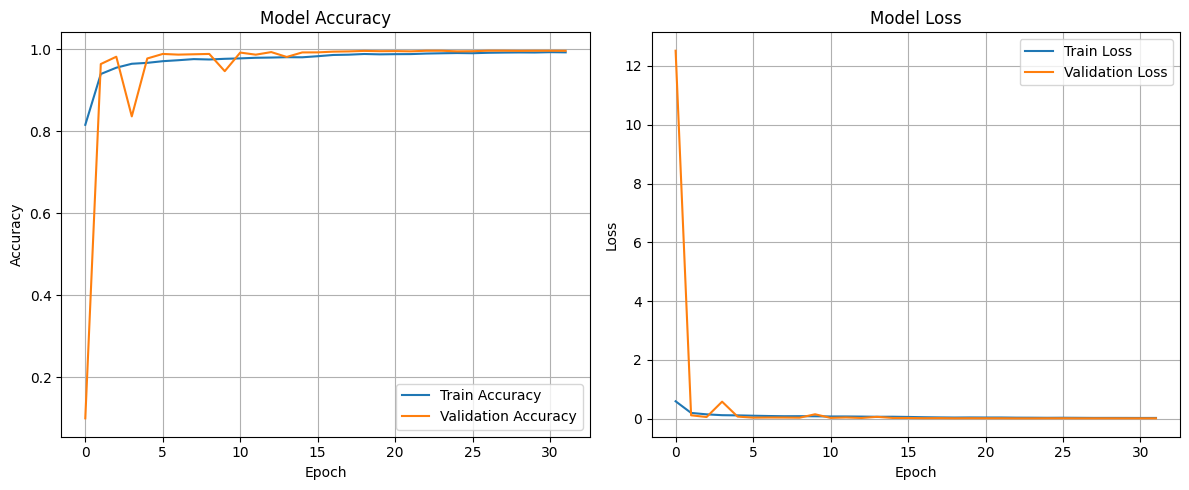

In [21]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# **Step 7: Prepare Submission File**

In [22]:
# 8. Load test data
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Preprocess test data
X_test = test_data.values.reshape(-1, 28, 28, 1) / 255.0

# 9. Predict
predictions = model_cnn.predict(X_test)
predictions = np.argmax(predictions, axis=1)

# 10. Create submission file
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(predictions) + 1),
    'Label': predictions
})

submission.to_csv('submission.csv', index=False)
print("✅ Submission file 'submission.csv' created successfully!")


875/875 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step
✅ Submission file 'submission.csv' created successfully!


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model

# 1. Data Augmentation (✅ smaller changes!)
datagen = ImageDataGenerator(
    rotation_range=5,       # smaller rotation
    zoom_range=0.05,        # smaller zoom
    width_shift_range=0.05, # smaller horizontal shift
    height_shift_range=0.05 # smaller vertical shift
)
datagen.fit(X_train_cnn)

# 2. CNN Model
model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 3. Compile
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 4. Callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# 5. Train
history = model_cnn.fit(
    datagen.flow(X_train_cnn, y_train, batch_size=64),
    epochs=50,
    validation_data=(X_val_cnn, y_val),
    callbacks=[early_stop, lr_reduce, checkpoint]
)

# 6. Load the best model
model_cnn = load_model('best_model.keras')
print("✅ Best model loaded from 'best_model.keras'")

# 7. Predict Test Data
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
X_test = test_data.values.reshape(-1, 28, 28, 1) / 255.0

predictions = model_cnn.predict(X_test)
predictions = np.argmax(predictions, axis=1)

# 8. Create Submission
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(predictions) + 1),
    'Label': predictions
})

submission.to_csv('submission.csv', index=False)
print("✅ Submission file 'submission.csv' created successfully!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7767 - loss: 0.7995
Epoch 1: val_accuracy improved from -inf to 0.62964, saving model to best_model.keras
525/525 ━━━━━━━━━━━━━━━━━━━━ 67s 116ms/step - accuracy: 0.7769 - loss: 0.7987 - val_accuracy: 0.6296 - val_loss: 1.1380 - learning_rate: 0.0010
Epoch 2/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9571 - loss: 0.1403
Epoch 2: val_accuracy improved from 0.62964 to 0.98167, saving model to best_model.keras
525/525 ━━━━━━━━━━━━━━━━━━━━ 59s 113ms/step - accuracy: 0.9571 - loss: 0.1403 - val_accuracy: 0.9817 - val_loss: 0.0559 - learning_rate: 0.0010
Epoch 3/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9659 - loss: 0.1129
Epoch 3: val_accuracy improved from 0.98167 to 0.98571, saving model to best_model.keras
525/525 ━━━━━━━━━━━━━━━━━━━━ 60s 115ms/step - accuracy: 0.9659 - loss: 0.1129 - val_accuracy: 0.9857 - val_loss: 0.0477 - learning_rate: 0.0010
Epoch 4/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/st